Use the NC.py file to generate the sequences. This will then generate Intron and Exon grayscale images.

In [2]:
import numpy as np
import pathlib
import pandas
import itertools
import os
import matplotlib.pyplot as plt

cwd = pathlib.Path.cwd()

# cds_images = cwd / "FractalImage" / "CDS"
intron_images = cwd / "FractalImageEvI" / "INTRON"
# utr5_images = cwd / "FractalImage" / "UTR5"
# utr3_images = cwd / "FractalImage" / "UTR3"
exon_images = cwd / "FractalImageEvI" / "EXON"

# cds_images.mkdir(parents = True, exist_ok = True)
intron_images.mkdir(parents = True, exist_ok = True)
# utr5_images.mkdir(parents = True, exist_ok = True)
# utr3_images.mkdir(parents = True, exist_ok = True)
exon_images.mkdir(parents = True, exist_ok = True)

In [3]:
def manhattan_position(nuc: int, x0: int):
    '''
    '''
    x1: np.array = (nuc - x0) / 2

    return x1.astype(int)


def nucleotide_permutations(sequence: str = "ACGT", length: int = 3) -> dict:
    nuc_perm = dict()

    if len(sequence) < length:
        return None

    perms = itertools.permutations(sequence, length)
    for p in perms:

        key = ""
        for n in p:
            key = f"{key}{n}"

        nuc_perm[key] = 0

    return nuc_perm


def nucleotide_counter(sequence: str, window_size: int):
    '''
    '''
    keys: set = set()
    counter = dict()
    master_count = 0


    for i in range(len(sequence) - window_size):
        seq = sequence[i: i + window_size - 1]

        if seq not in keys:
            keys.add(seq)
            counter[seq] = 1
            master_count += 1

        else:
            counter[seq] += 1
            master_count += 1

    # for key, value in counter.items():
    #     counter[key] = value / master_count

    return counter

    



def chaos_game_representation(probabilities: dict, k):
    array_size = int(np.sqrt(4**k))

    cgr = np.zeros(shape = (array_size, array_size))

    for key, value in probabilities.items():
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
 
        for char in key:
            if char == "T":
                posx += maxx / 2
            elif char == "C":
                posy += maxy / 2
            elif char == "G":
                posx += maxx / 2
                posy += maxy / 2
            maxx /=  2
            maxy /= 2

        # print(int(posy), int(posx))
        cgr[int(posy - 1)][int(posx - 1)] = value


    return cgr


def gif_generator(path: str, filename: str):
    '''
    '''
    png_files = list(path.rglob("*.png"))
    png_files.sort(key = lambda x: os.path.getmtime(x))

    frames = []
    for png in png_files:
        new_frame = Image.open(png)
        # print(png)
        frames.append(new_frame)


    frames[0].save(filename, format="GIF", append_images=frames[1:], save_all = True, loop = 0, duration = 225) 


In [4]:
train_data: pandas.DataFrame = pandas.read_pickle(cwd / "TrainingGeneData_v4.pkl")
# print(train_data.shape)

keep = np.where(train_data["Seq"].str.len() >= 100)[0]
# print(keep)
train_data = train_data.iloc[keep, :]

rows, cols = train_data.shape

train_data = train_data.reset_index()

# print(train_data["Type"].unique())

# print(train_data.shape)
# print(train_data)

print(train_data)

FileNotFoundError: [Errno 2] No such file or directory: 'd:\\Coding\\Thesis\\ML\\TrainingGeneData_v4.pkl'

[[3. 0. 2. ... 0. 9. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 4. ... 0. 8. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10.0 0.0


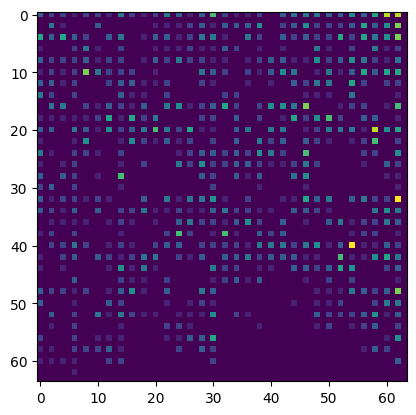

In [55]:
kmer = 6

exon = 0
intron, intname = 0, "Intron"
cds, cdsname = 0, "CDS"
utr3, ut3name = 0, "UTR3"
utr5, ut5name = 0, "UTR5"

for row in range(rows):
    seq = train_data.loc[row, "Seq"]
    typ = train_data.loc[row, "Type"]

    mer = nucleotide_counter(seq, kmer)
    cgr = chaos_game_representation(mer, kmer)

    print(cgr)
    print(np.max(cgr), np.min(cgr))

    plt.imshow(cgr, cmap = "gray")

    if typ in intname:
        filepath = intron_images / f"IN_{intron}.png"
        plt.imsave(filepath, cgr, cmap = "gray")
        intron += 1

    elif typ in cdsname:
        filepath = cds_images / f"CDS_{cds}.png"
        plt.imsave(filepath, cgr, cmap = "gray")

        filepath = exon_images / f"Exon_{exon}.png"
        plt.imsave(filepath, cgr, cmap = "gray")

        cds += 1
        exon += 1

    elif typ in ut5name:
        filepath = utr5_images / f"UTR5_{utr5}.png"
        plt.imsave(filepath, cgr, cmap = "gray")

        filepath = exon_images / f"Exon_{exon}.png"
        plt.imsave(filepath, cgr, cmap = "gray")

        utr5 += 1
        exon += 1

    elif typ in ut3name:
        filepath = utr3_images / f"UTR3_{utr3}.png"
        plt.imsave(filepath, cgr, cmap = "gray")

        filepath = exon_images / f"Exon_{exon}.png"
        plt.imsave(filepath, cgr, cmap = "gray")

        utr3 += 1
        exon += 1
    